# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### Is the body temperature normally distributed?
Since our sample size is larger than 30, we can assume a normal distribution, which is confirmed by the roughly bell-curved graph shown in the histogram below.

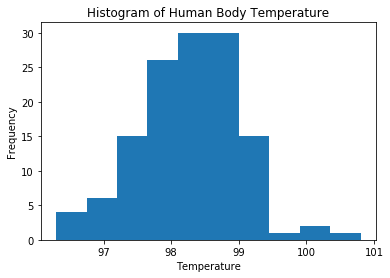

In [45]:
import matplotlib.pyplot as plt

plt.hist(df.temperature)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Human Body Temperature')
plt.show()


### Is the true population mean really 98.6 degrees?

We can formulate 2 hypotheses:

$H_0$: $\mu$ = 98.6

$H_A$: $\mu$ # 98.6

Since the sample size n > 30, we can use a one sample z-test

In [78]:
# z-test
import numpy as np

sample_std_error = df.temperature.std()/np.sqrt(len(df)) # Calculate std deviation (std error) for the sampling distribution
sample_mean = df.temperature.mean() # Calculate mean for the sampling distribution
z = (sample_mean - 98.6)/sample_std_error #Calculate z-score
pval = stats.t.sf(abs(z), len(df)-1) * 2  #p-value for 2-sided test

print ('z-statistic =', z , 'and p-value =', pval)

z-statistic = -5.45482329236 and p-value = 2.41063204156e-07


So, under the $H_0$, our sample mean is 5.45 standard deviations away from the true mean. With a significance level of 5%, the critical z-score for a two-tailed test is 1.96. Since 5.45 > 1.96, we reject the null hypothesis and conclude that the true population mean is not 98.6 degrees.

We can perform this test again using the t-statisticas follows, and the results are similar to the z-test.

In [85]:
# t-test
from scipy import stats
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### At what temperatures should we consider someone's temperature abnormal?
The z-score corresponding to a 95% confidence interval is 1.96. We can calculate the 95% CI as follows. Any temperature falling outside of this range can be considered abnormal.

In [86]:
print ('95% Confidence Interval: ',(sample_mean - 1.96*sample_std_error, sample_mean + 1.96*sample_std_error))

95% Confidence Interval:  (98.123194112228518, 98.375267426233037)


### Is there a significant difference between male and female temperatures?

We can formulate 2 hypotheses:  
$H_0$: $\mu_M$ - $\mu_F$= 0    
$H_A$: $\mu_M$ - $\mu_F$ # 0



In [81]:
# Create male and female subsets
df_male = df[df.gender == "M"]
df_female = df[df.gender == 'F']
print (len(df_male), len(df_female))

65 65


Since the sample size for each group is > 30, we can assume normal distribution for each sample and use a two sample z-test.

In [87]:
# z-test (manual way):

mean_mf = df_male.temperature.mean() - df_female.temperature.mean() #Mean of the sampling distribution of our statistic
std_error_mf = np.sqrt(df_male.temperature.std()**2/len(df_male) + df_female.temperature.std()**2/len(df_female)) #Std error
#of the sampling distribution
z = mean_mf/std_error_mf #z-score 
pval = stats.t.sf(abs(z), len(df_male)-1) * 2  #p-value for 2-sided test

print ('z-statistic =', z , 'and p-value =', pval)

z-statistic = -2.28543453817 and p-value = 0.0256096133919


In [88]:
# t-test using the stats.ttest_ind function:
stats.ttest_ind(df_male.temperature, df_female.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

With a significance level of 5%, the critical z-score for a two-tailed test is 1.96. Since the absolute value of the z-statistic we got is 2.28 > 1.96, we reject the null hypothesis in favor of the alternative and conclude that the temperatures for male and female are not the same.